In [1]:
import numpy as np
import pyfftw
from ttictoc import tic,toc
from PIL import Image, ImageDraw
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from Xsmurf_functions import *

In [2]:
# !conda install pyfftw

In [3]:
basepath = '/Users/jukesliu/Documents/AUTO-TERMINUS/Python_translation/' # CHANGE THIS

# 1 image at a time

## 1) Load terminus box

(428, 436)


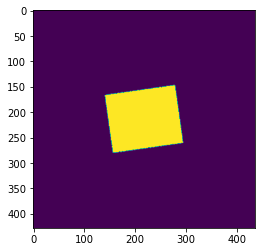

In [4]:
# use terminus box raster to mask out external chains
box = Image.open(basepath+'R_Box174_raster_cut.png')
box_array = np.array(box)[:,:,0]/255 # grab 1D slice from array and convert to binary
print(box_array.shape)
plt.imshow(box_array); plt.show()  # Display mask

## 2) Open image(s) for testing:

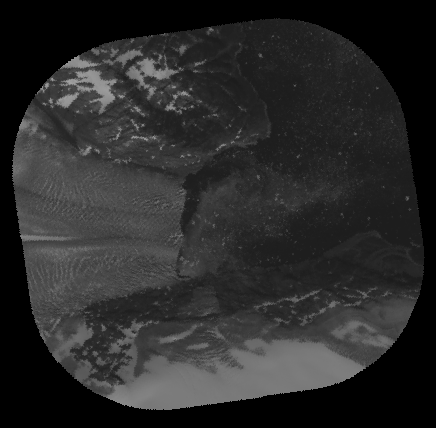

In [12]:
# # open glacier image for testing
img  = Image.open(basepath+'R_LC08_L1TP_233017_20170813_20170814_01_RT_B8_Buffer174_PS.png')

# OR generate circle image
# img = generate_circle_image(100, 436, 428)

img

## 3) Run wtmm2d and show outputs:

In [13]:
# [dx,dy,F,f,gx,gy] = wtmm2d(img,'gauss',10)
[dx,dy,mm,m,a] = wtmm2d(img,'gauss',200) # scale = 200 pixels

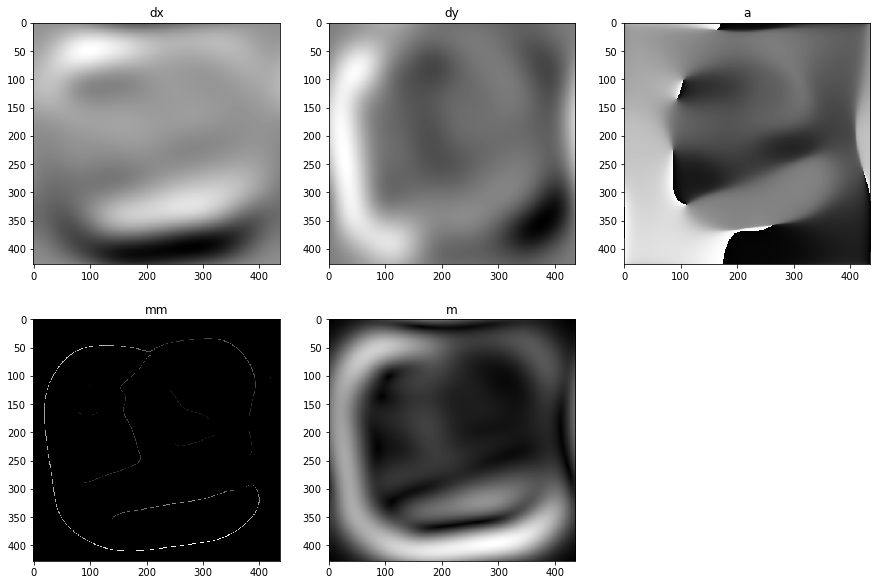

In [14]:
# Visualize outputs from wtmm2d:
fig, axs = plt.subplots(2,3,figsize=(15,10))
axs[0,0].imshow(dx, aspect='equal', cmap = 'gray', interpolation='none'); axs[0,0].set_title('dx') # x gradient
axs[0,1].imshow(dy, aspect='equal', cmap = 'gray', interpolation='none'); axs[0,1].set_title('dy') # y gradient

axs[0,2].imshow(a, aspect='equal', cmap = 'gray', interpolation='none'); axs[0,2].set_title('a') # argument            
axs[1,0].imshow(mm, aspect='equal', cmap = 'gray', interpolation='none', vmin = np.min(mm), vmax = np.max(m)); 
axs[1,0].set_title('mm') # modulus maxima (interpolated)
axs[1,1].imshow(m, aspect='equal', cmap = 'gray', interpolation='none',vmin = np.min(mm), vmax = np.max(m));
axs[1,1].set_title('m') # modulus
axs[-1, -1].axis('off')

Image.fromarray(mm).save('mm.tif')   
Image.fromarray(m).save('m.tif')   

# plt.savefig('glacier_WTMM_test.png',dpi=200)
plt.show()

## 4) Mask using terminus box - emask

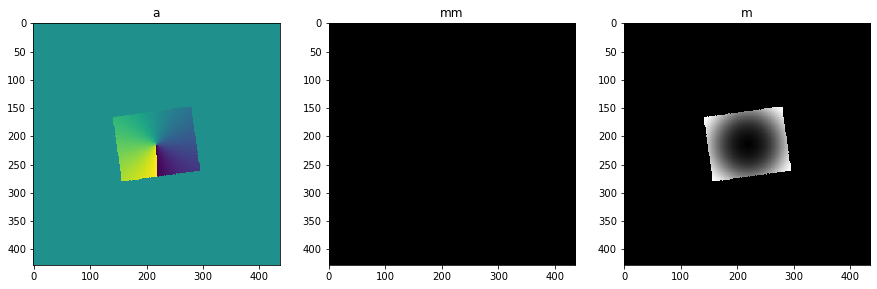

In [8]:
# Mask
masked_a = emask(box_array, a)
masked_mm = emask(box_array, mm)
masked_m = emask(box_array, m)

# Visualize masked outputs from wtmm2d:
fig, axs = plt.subplots(1,3,figsize=(15,10))

axs[0].imshow(masked_a, aspect='equal', cmap = 'viridis', interpolation='none'); axs[0].set_title('a')              
axs[1].imshow(masked_mm, aspect='equal', cmap = 'gray', interpolation='none', vmin = np.min(masked_mm), vmax = np.max(masked_mm)); 
axs[1].set_title('mm')
axs[2].imshow(masked_m, aspect='equal', cmap = 'gray', interpolation='none',vmin = np.min(masked_m), vmax = np.max(masked_m));
axs[2].set_title('m')
# plt.savefig('glacier_WTMM_test.png',dpi=200)
plt.show()

## 5) Chain remaining mms

In [9]:
cmm = wtmmchains(masked_mm,masked_a,1,200) # chain at a specified scale

Chaining done.


In [10]:
cmm_passed = []
# Filter chains
for j in range(0, len(cmm)):
    if cmm[j].size > 0:
        cmm_passed.append(cmm[j])

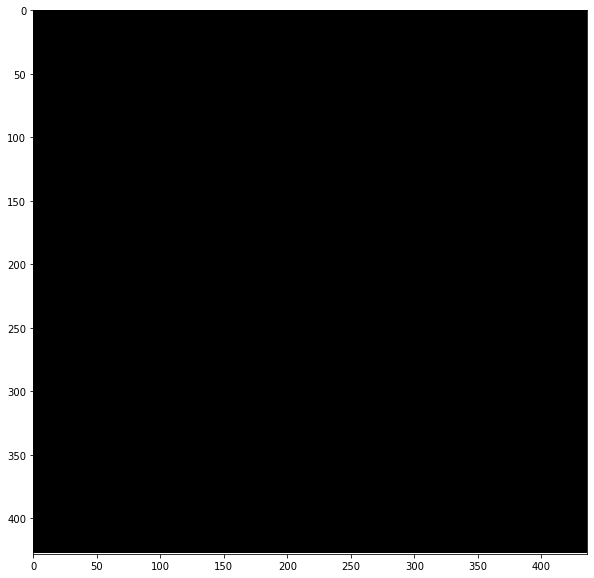

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(masked_mm,cmap='gray')
plt.xlim([0, mm.shape[1]])
plt.ylim([0, mm.shape[0]])
plt.gca().set_aspect('equal'); plt.gca().invert_yaxis()
    
for k in range(0, len(cmm_passed)):
    plt.plot(cmm_passed[k].ix, cmm_passed[k].iy, 's-', markersize=0.5)
plt.show()

In [ ]:
len(cmm_passed)

# WTMM and chaining for all 50 scales

In [98]:
amin = 1
nOct = 5
nVox = 10
wavelet = 'gauss'

0.07946347299730405
12.317185878997407
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 6.976744186046512


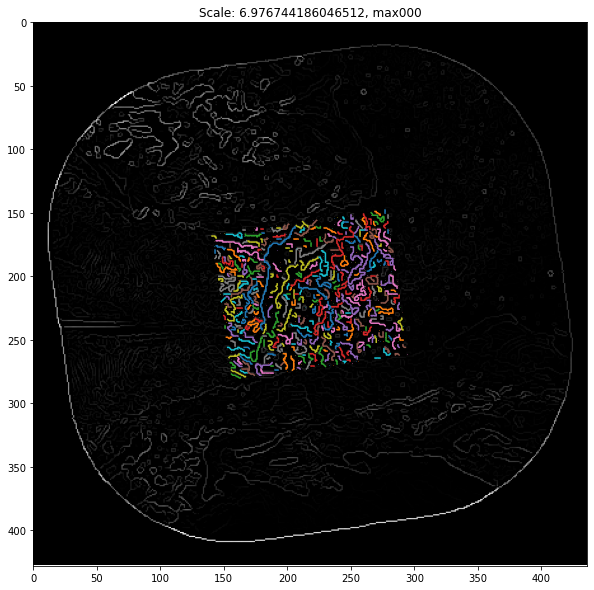

0.07892789099787478
12.667497067002842
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 7.477489273509022


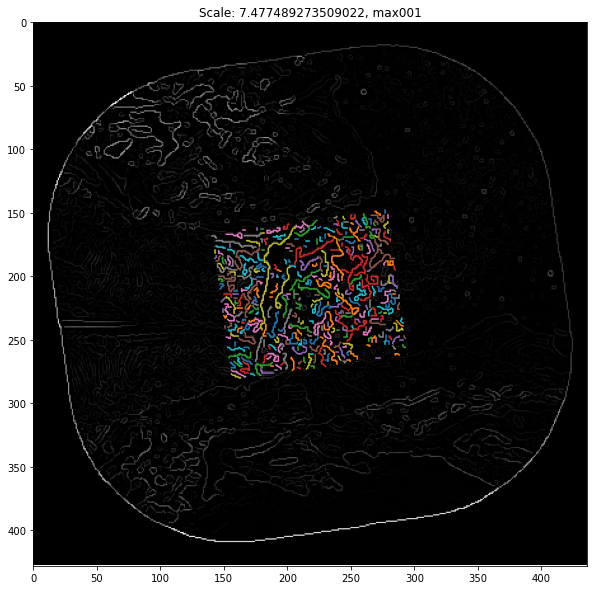

0.06887086799906683
12.429313094002282
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 8.014174569746757


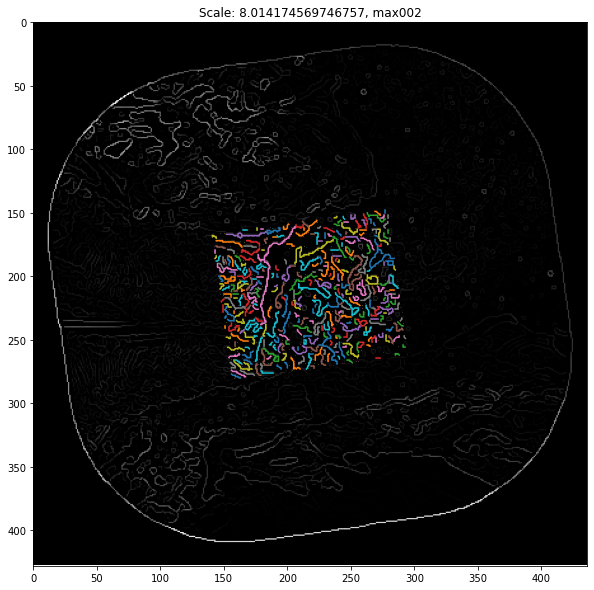

0.07765667800049414
13.276223592998576
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 8.589379627987789


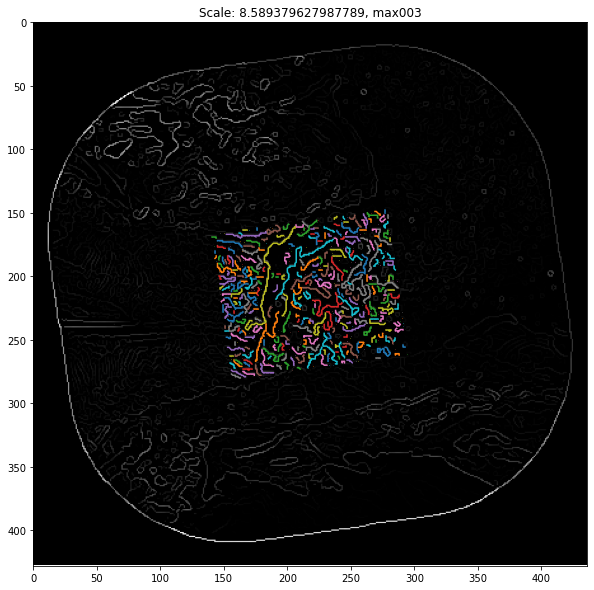

0.06875148299877765
13.078727642001468
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 9.205869144927169


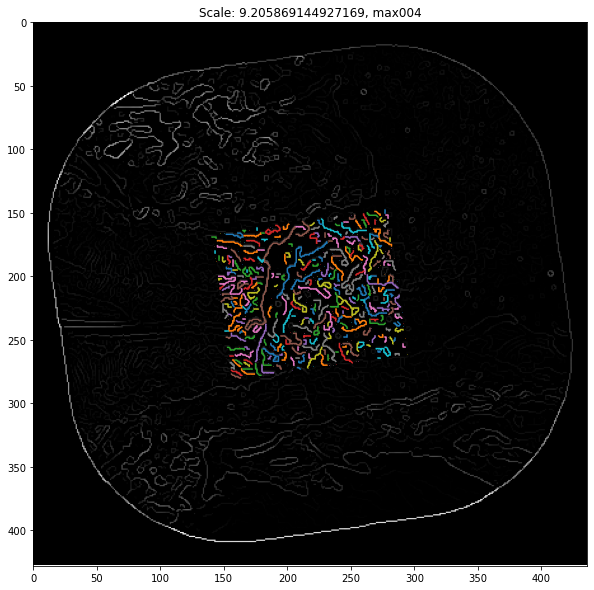

0.0728783319973445
12.917878246997134
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 9.866606249114618


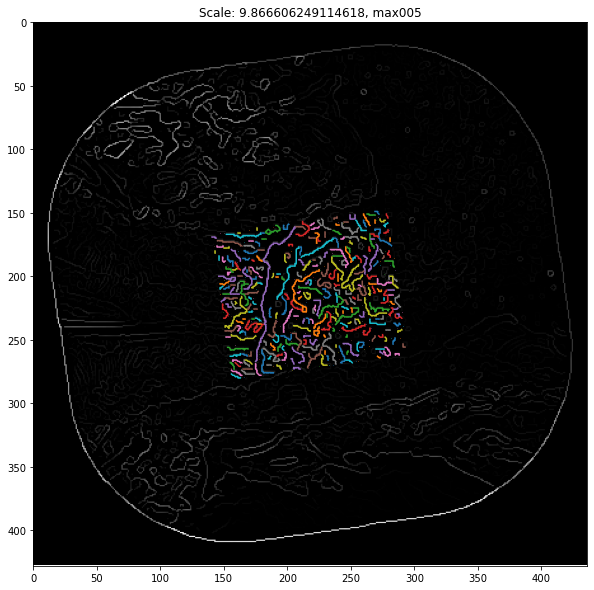

0.06819364599869004
12.618473113001528
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 10.5747667430958


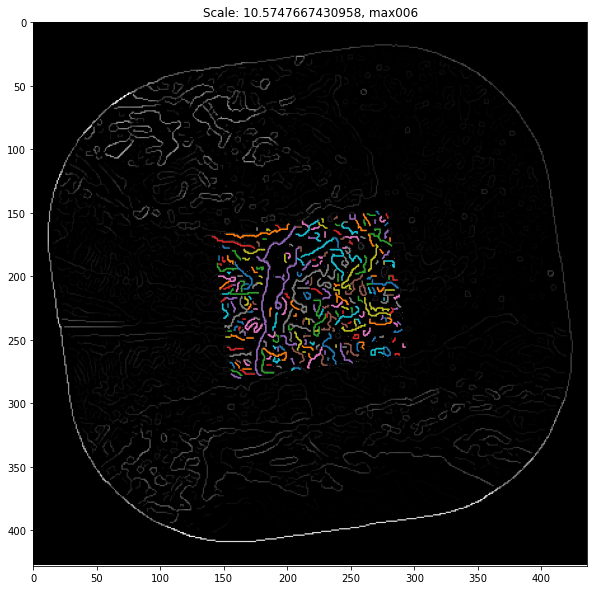

0.06587558699902729
12.667237813999236
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 11.333754367761426


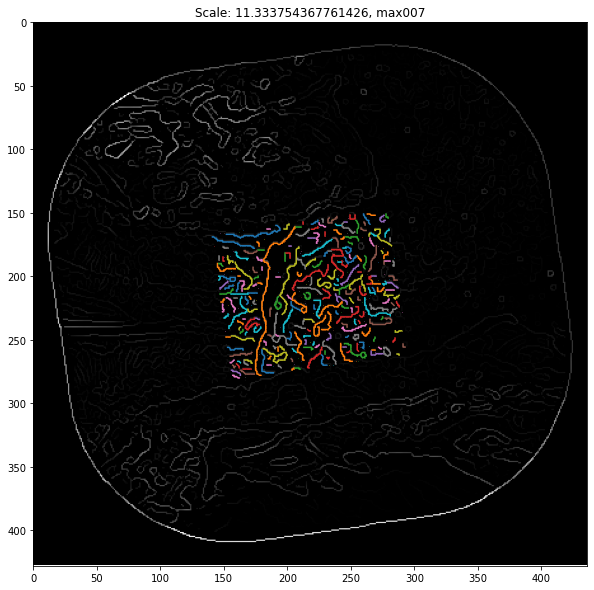

0.06937515699974028
12.77243075899969
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 12.147217162271499


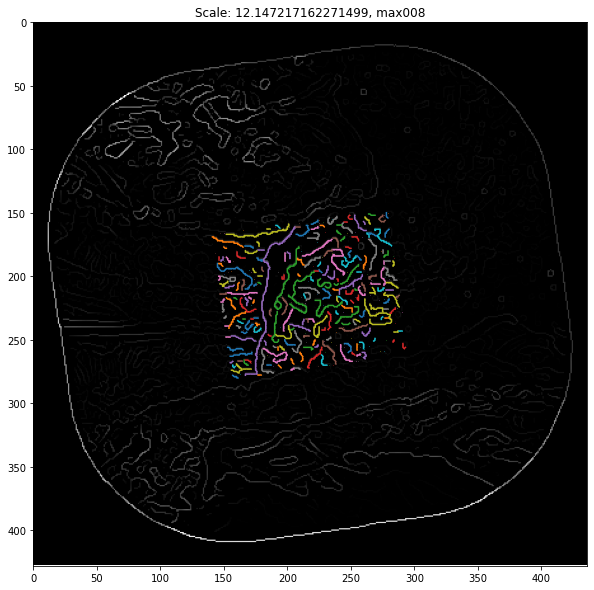

0.0699690119981824
12.570870769002795
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 13.01906499818801


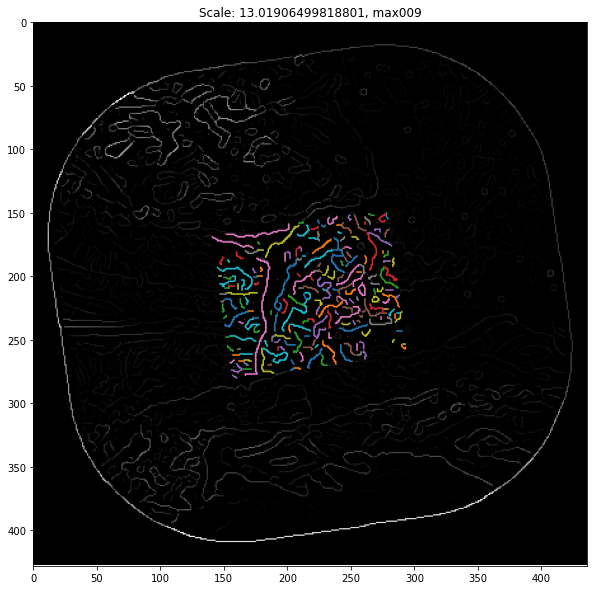

0.06602583700077957
12.50828683600048
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 13.953488372093023


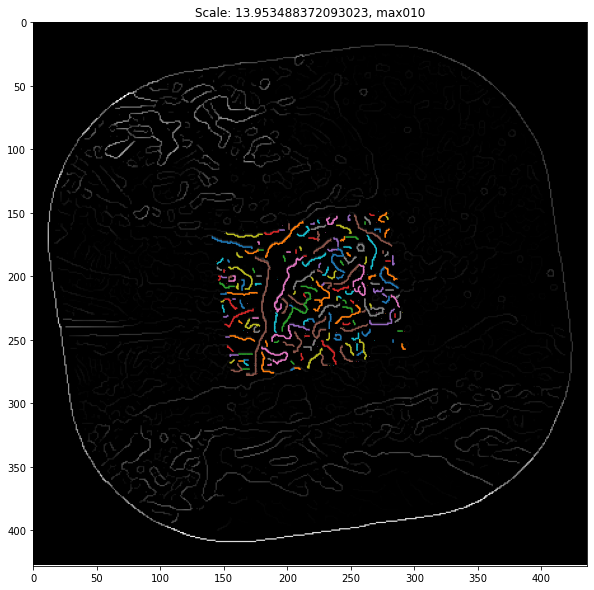

0.06482867300292128
12.829550482998457
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 14.954978547018044


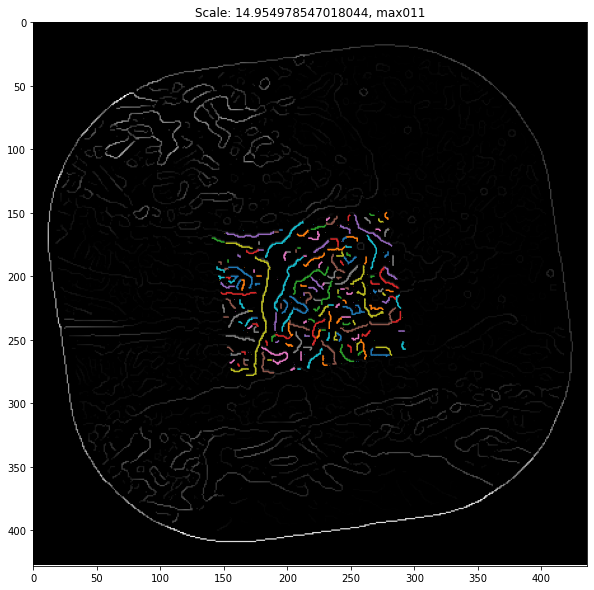

0.06478213100126595


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


12.471043647001352
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 16.02834913949351


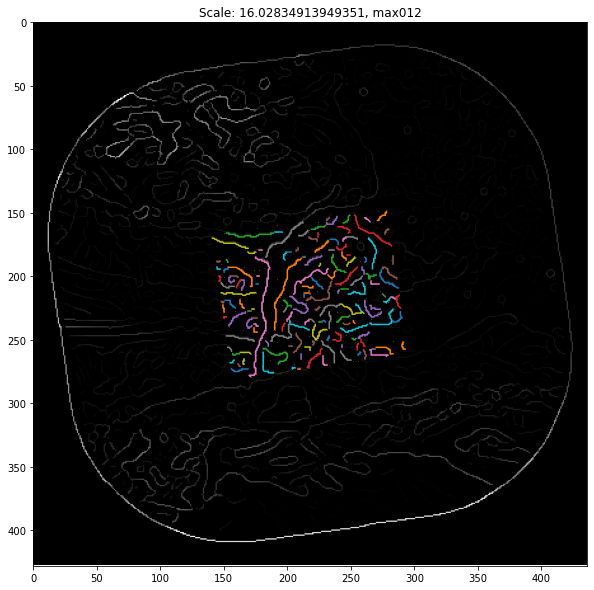

0.06559579399981885


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


12.352151366998442
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 17.178759255975578


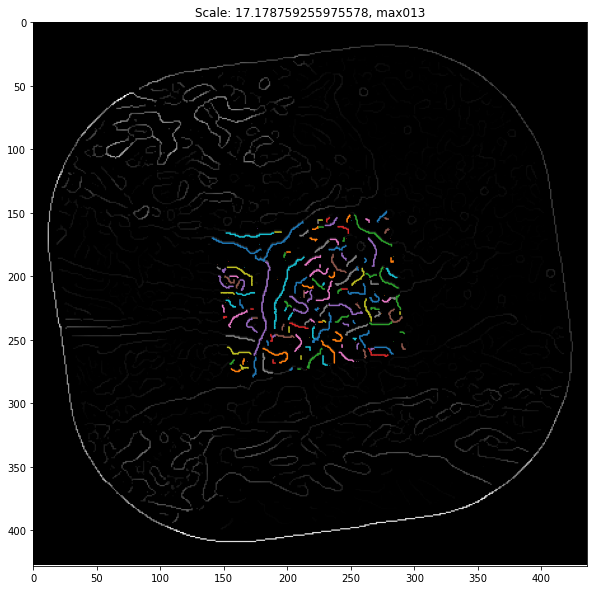

0.0686277050008357


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


12.339260338001623
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 18.411738289854338


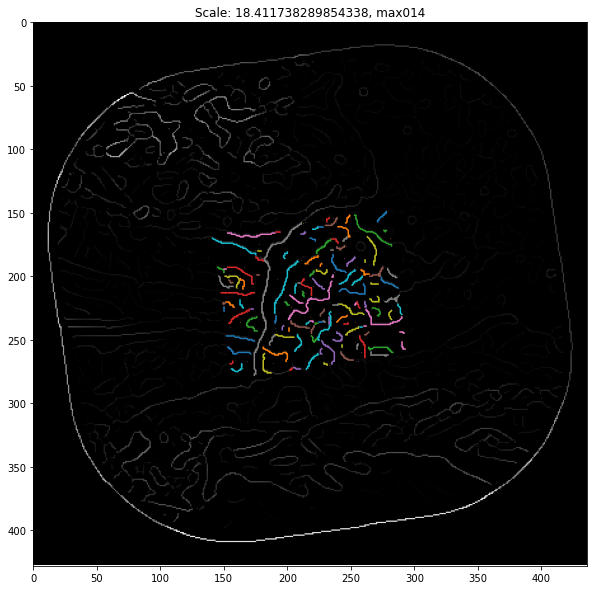

0.07373410499712918


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


12.838218423999933
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 19.733212498229236


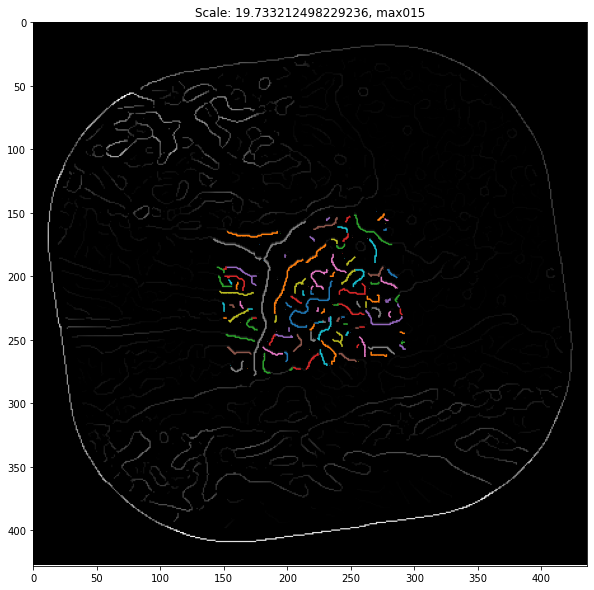

0.0683085740020033


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


12.030754180999793
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 21.149533486191604


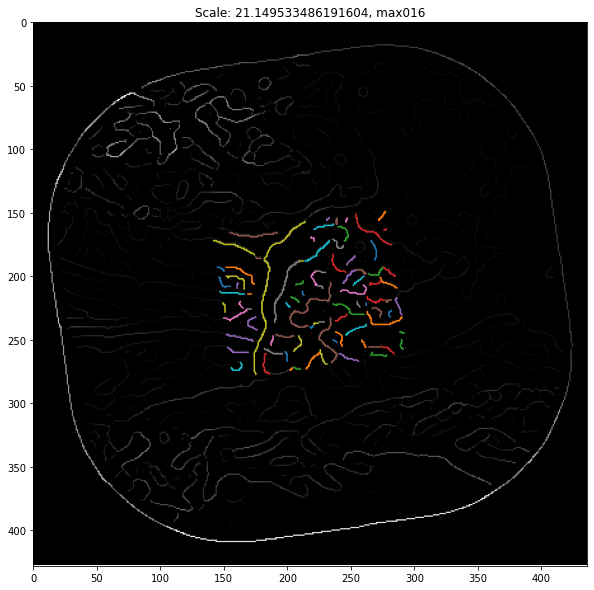

0.06706830200346303


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


12.001491535997047
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 22.66750873552285


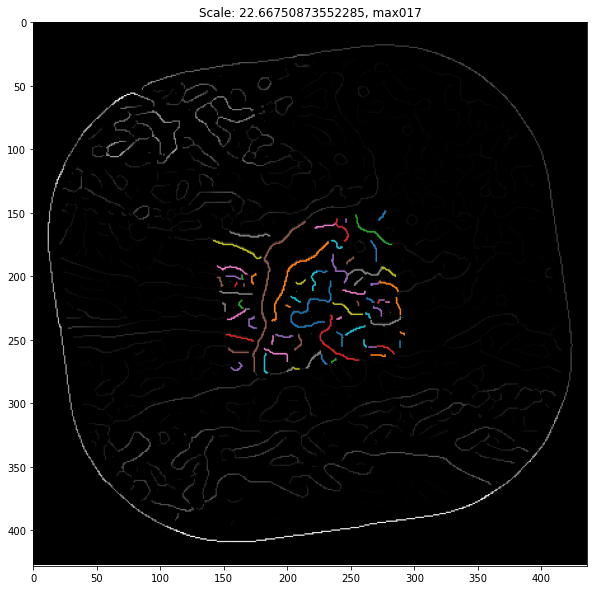

0.06585560100211296


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


11.890643110000383
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 24.294434324542998


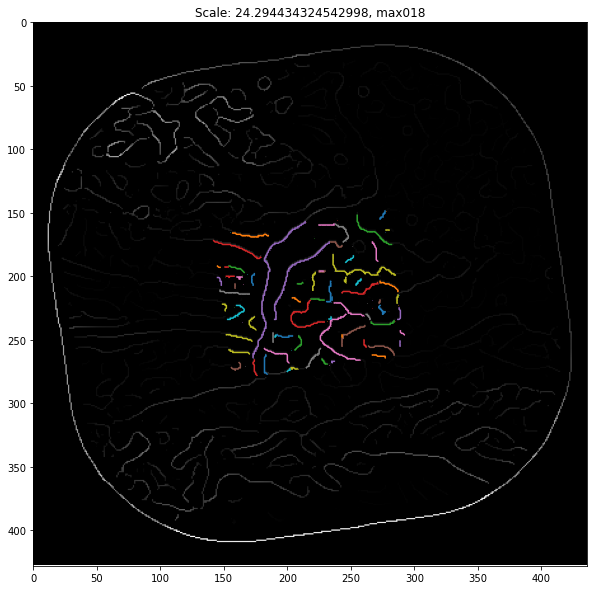

0.06640932599839289


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


11.698004420999496
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 26.03812999637602


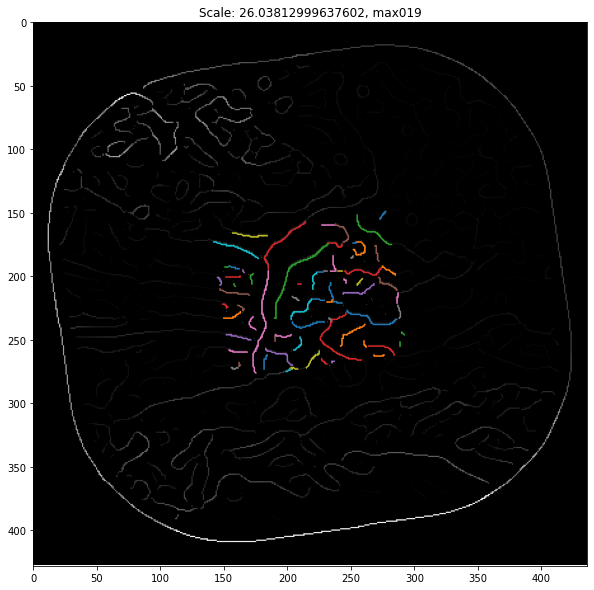

0.06314855899836402


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


11.817128833001334
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 27.906976744186046


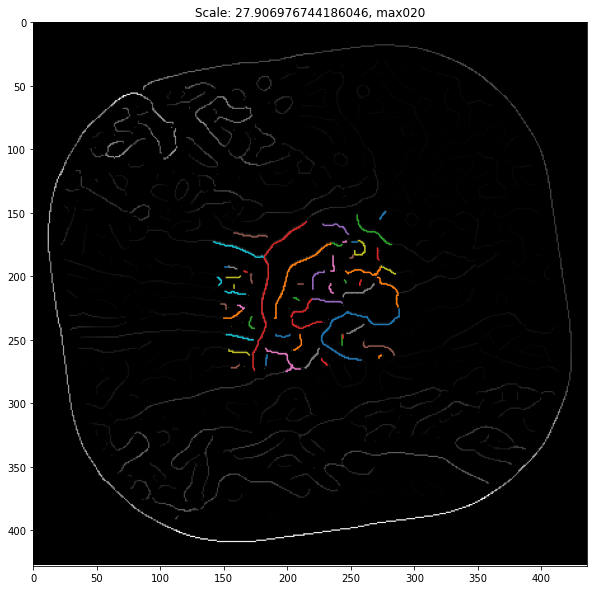

0.058971811002265895


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


11.910671719997481
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 29.909957094036088


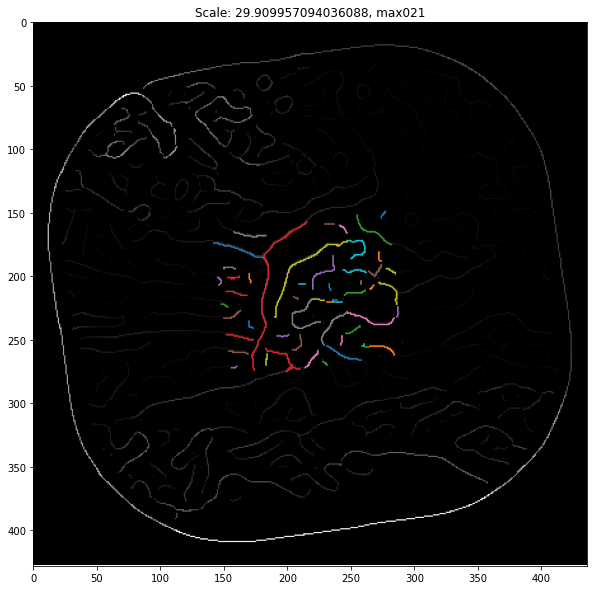

0.06775571400066838


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


11.812164486000256
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 32.05669827898703


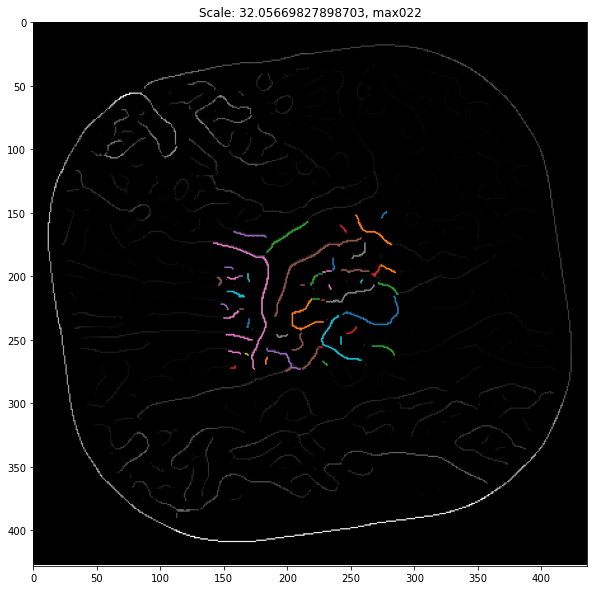

0.06608620499901008


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


12.278153712999483
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 34.35751851195115


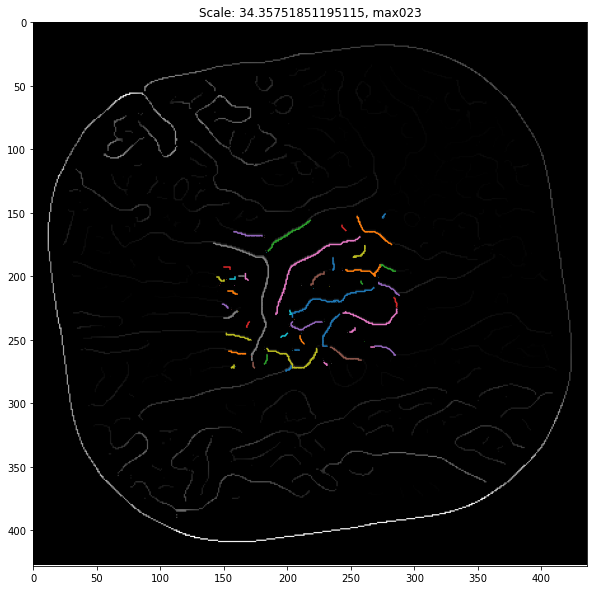

0.06258439600060228


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


11.860087373999704
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 36.823476579708675


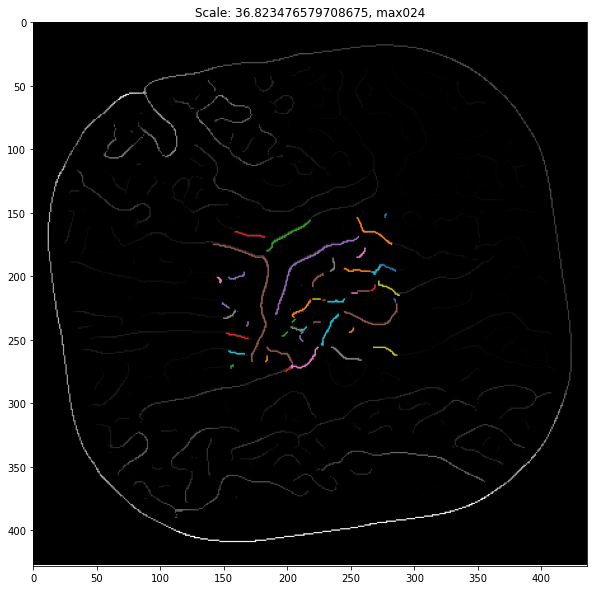

0.06397377699977369


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


11.961395248999906
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 39.46642499645847


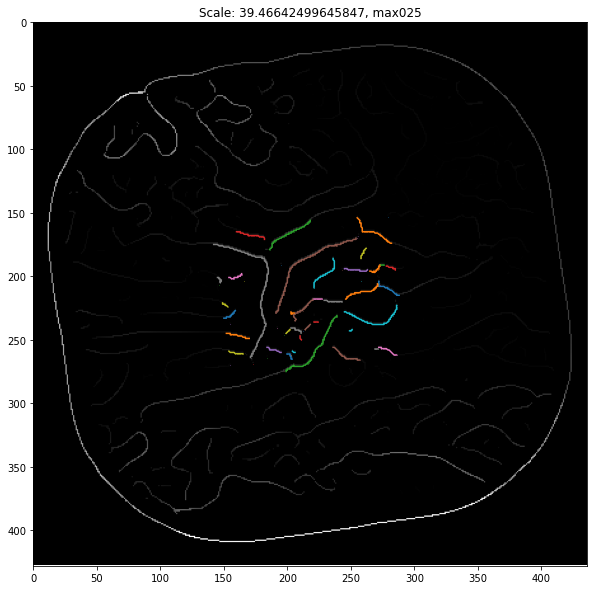

0.06275435399948037


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


11.899552563001635
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 42.29906697238321


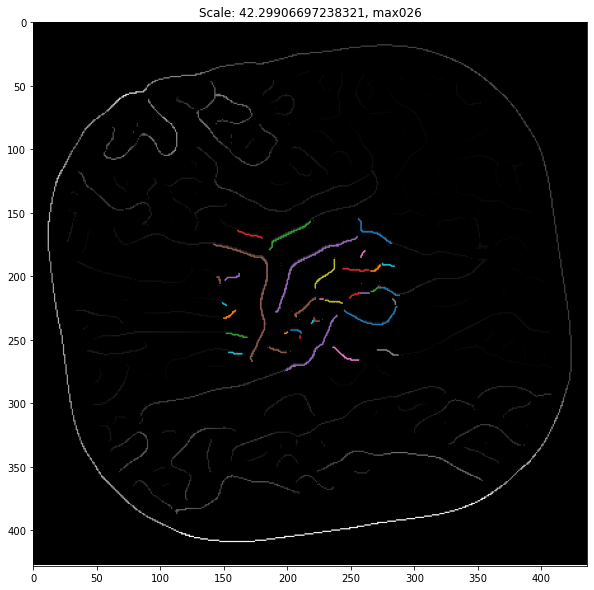

0.06416541999715264


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


12.402031091998651
Wavelet transform done.
Masking done.
Chaining done.
Chaining done.
Scale: 45.33501747104571


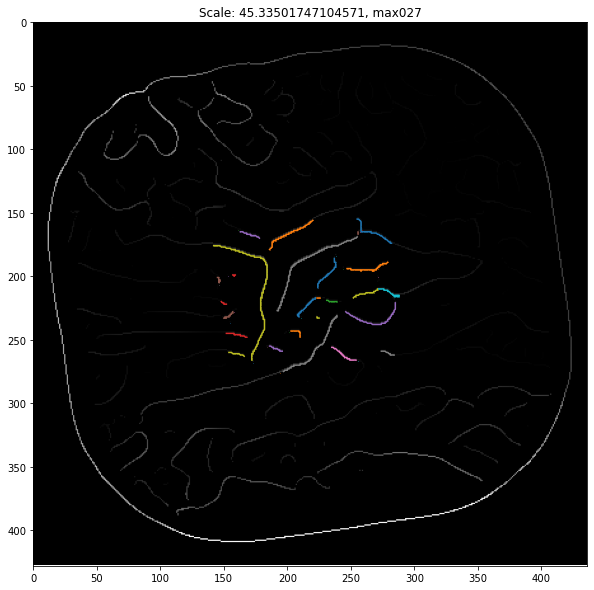

0.06353189299989026


<ipython-input-115-f94a5a16f6ba>:100: RuntimeWarning: invalid value encountered in true_divide
  dx_norm = np.divide(dx,m)
<ipython-input-115-f94a5a16f6ba>:101: RuntimeWarning: invalid value encountered in true_divide
  dy_norm = np.divide(dy,m)


KeyboardInterrupt: 

In [122]:
counter = 0
all_cmm = []
# ascend over all scales
for iOct in np.arange(0, nOct):
    for iVox in np.arange(0, nVox):
        
        # calculate scale in pixels
        scale = 6/0.86*amin*2**(iOct+(iVox/nVox))
        
#         if scale > 16 and scale < 17:
        if True == True:

            # wavelet transform
            [dx, dy, mm, m, a] = wtmm2d(img, wavelet, scale)
            print('Wavelet transform done.')
            # emask
            masked_a = emask(box_array, a)
            masked_mm = emask(box_array, mm)
            masked_m = emask(box_array, m)
            print('Masking done.')

            # chain
            cmm = wtmmchains(masked_mm,masked_a,0,scale)
#             cmm = wtmmchains(mm,a,1,scale) # for circle images
            print('Chaining done.')

            # visualize results:
            plt.figure(figsize=(10,10))
            print('Scale:', str(scale))
#             fig, axs = plt.subplots(2,2,figsize=(20,20))
#             axs[0,0].imshow(m, aspect='equal', cmap = 'gray', interpolation='none'); axs[0,0].set_title('m')
#             axs[0,1].imshow(mm, aspect='equal', cmap = 'gray', interpolation='none'); axs[0,1].set_title('mm')
#             axs[1,0].imshow(a, aspect='equal', cmap = 'gray', interpolation='none'); axs[1,0].set_title('a')
#             axs[1,1].imshow(mm, aspect='equal', cmap = 'gray', interpolation='none'); axs[1,1].set_title('maxima chains')
            plt.imshow(mm, aspect='equal', cmap = 'gray')
            plt.title('Scale: '+str(scale)+', max'+str(counter).zfill(3))
            plt.xlim([0, m.shape[1]])
            plt.ylim([0, m.shape[0]])
            plt.gca().set_aspect('equal'); plt.gca().invert_yaxis()
            for k in range(0, len(cmm)):
                plt.plot(cmm[k].ix, cmm[k].iy, 's-', markersize=0.1)
            
#             plt.savefig(basepath+'output_images/'+'circletest_scale'+str(counter).zfill(3)+'.jpg')
#             plt.savefig(basepath+'output_images/'+'glaciertest_scale'+str(counter).zfill(3)+'.jpg')
            plt.show()
    
            # increment
            all_cmm.extend(cmm)
            counter = counter +1 

# Use thresholds on chain properties to pick the glacier terminus chain

In [209]:
# set filtering order (M = linemeanmod, S = size, A = argument)
order = '_MSA'
size_thresh = 0.4 # Size percentile across all images
mod_thresh = 0.7 # Linemeanmod percentile across all images
arg_thresh = 0.1 # left-right argument fraction
metric = 0 # 0 = mass, 1 = scaledmass, 2 = size

## A) 1 image at a time

In [210]:
mass_or_size = []
passed_chains = []
for chain in all_cmm:
    if chain.linemeanmod > mod_thresh: # only chains that pass the mod threshold
        if chain.size > size_thresh: # only chains that pass the size threshold
            [passedargs, argfrac] = filter_args(chain.args, np.pi/3) # identify the left & right-pointing args
            if argfrac > arg_thresh: # only chains that pass the orientation threshold
                if metric == 0:
                    mass_or_size.append(chain.mass)
                elif metric == 1:
                    mass_or_size.append(chain.scaled_mass)
                else:
                    mass_or_size.append(chain.size)
                passed_chains.append(chain)

In [211]:
top_chains = sorted(zip(mass_or_size, passed_chains),reverse=True)[:5] # sort chains that passed

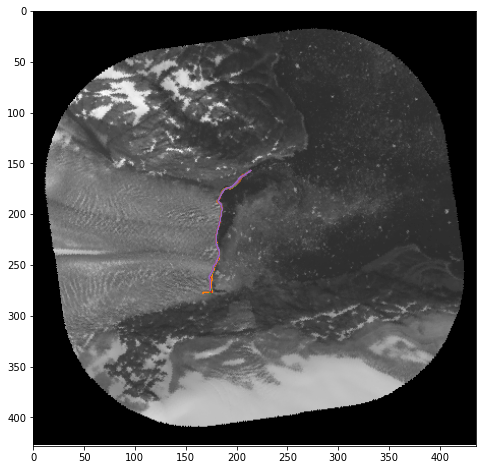

In [212]:
 # visualize top chains:
plt.figure(figsize=(8,8))
plt.imshow(np.array(img), aspect='equal', cmap = 'gray')
plt.xlim([0, m.shape[1]])
plt.ylim([0, m.shape[0]])
plt.gca().set_aspect('equal'); plt.gca().invert_yaxis()
for k in range(0, len(top_chains)):
    plt.plot(top_chains[k][1].ix, top_chains[k][1].iy, 's-', markersize=0.1)
            
plt.show()

## B) on multiple CPUs